In [4]:
from google.colab import files
uploaded=files.upload()

Saving BrainTumorData.csv to BrainTumorData.csv


In [0]:
import pandas as pd
pd.set_option('display.width',1000)
pd.set_option('display.max_column',40)
pd.set_option('precision',2)

In [6]:
import io #input output
data=pd.read_csv(io.BytesIO(uploaded['BrainTumorData.csv']),
                    index_col=False)
print(data)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0      842302         M        17.99         10.38          122.80     1001.0             0.12              0.28            0.30                 0.15           0.24                    0.08       1.09        0.91          8.59   153.40       6.40e-03        4.90e-02          0.05               0.02         0.03              6.19e-03         25.38          17.33           184.60      2019.0              0.16               0.67             0.71                  0.27           

In [7]:
print("data.shape=",data.shape,"\n\n") #rows column 
print(data.describe()) #for calculating data

data.shape= (569, 33) 


             id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
count  5.69e+02       569.00        569.00          569.00     569.00           569.00            569.00          569.00               569.00         569.00                5.69e+02     569.00      569.00        569.00   569.00       5.69e+02        5.69e+02        569.00           5.69e+02     5.69e+02              5.69e+02        569.00         569.00           569.00      569.00            569.00             569.00           569.00                569.00  

In [8]:
data['diagnosis']=data['diagnosis'].apply(lambda x: '1' if x== 'M' else '0') # lambda apply on whole expression
data=data.set_index('id') #id as row heading
del data['Unnamed: 32']
print("After Deletion of'Unnamed: 32' column\n",data)

After Deletion of'Unnamed: 32' column
          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
import warnings
warnings.filterwarnings(action="ignore")
print(data.groupby('diagnosis').size()) #total 0 & 1

diagnosis
0    357
1    212
dtype: int64


In [0]:
import matplotlib.pyplot as plt #for graph ploting
from matplotlib import cm as cm
#from sklearn.metrics import classification_report
#from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import KFold

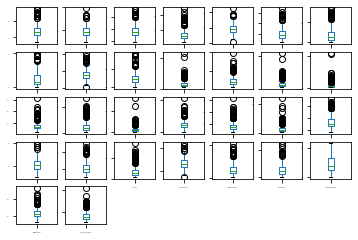

In [11]:
data.plot(kind='box',subplots=True,
         layout=(5,7), sharex=False, legend=False,
          fontsize=1)
plt.show()

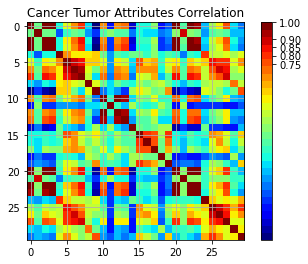

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap= cm.get_cmap('jet',30)
cax = ax1.imshow(data.corr(),
                 interpolation="none",cmap=cmap)
ax1.grid(True)
plt.title('Cancer Tumor Attributes Correlation')
#Add colorbar,make sure to specify tick
#locations to match desired ticklabels
fig.colorbar(cax,ticks=[.75,.8,.85,.90,1])
plt.show()

In [0]:
Y=data['diagnosis'].values
X=data.drop('diagnosis',axis=1).values

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
model.fit(X_train,Y_train)
predictdY=model.predict(X_test)
result=model.score(X_test,Y_test)
print("Accuracy=",(result*100),"%%")

Accuracy= 92.5531914893617 %%


In [15]:
model=LogisticRegression()
num_folds= 10
kfold=KFold(n_splits=num_folds)
result=cross_val_score(model,X,Y,cv=kfold)
print("KFold Accuracy=",result.mean())

KFold Accuracy= 0.9437969924812029


In [16]:
res=list(zip(Y_test,predictdY)) # zip reates the values of Y_test with predictdy
print(res) #o/p in list

[('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '0'), ('0', '0'), ('1', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('1', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '0'), ('0', '0'), ('0', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1